In [134]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [136]:
df=pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [137]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


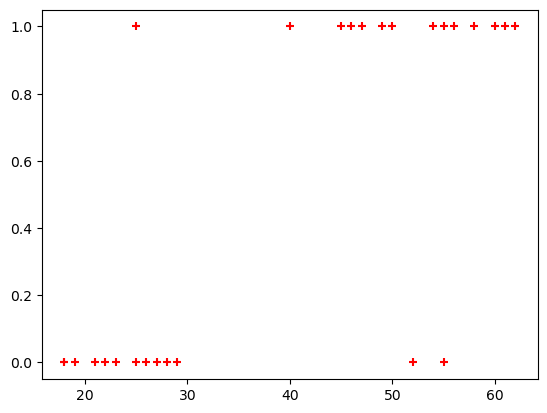

In [140]:
plt.scatter(df.age,df.bought_insurance,marker="+",color="red")

In [141]:
df.shape



(27, 2)

In [144]:
from sklearn.model_selection import train_test_split


In [146]:
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [148]:
X_test

,age
1,25
0,22
3,52


In [150]:
X_train

,age
2,47
21,26
23,45
15,55
20,21
11,28
10,18
5,56
22,40
19,18


In [151]:


from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [154]:
model.fit(X_train,y_train)

LogisticRegression()

In [155]:
y_predicted=model.predict(X_test)

In [158]:
model.predict_proba(X_test)

array([[0.84797303, 0.15202697],
       [0.89908167, 0.10091833],
       [0.07616355, 0.92383645]])

In [159]:
model.score(X_test,y_test)

0.6666666666666666

In [162]:
y_predicted

array([0, 0, 1], dtype=int64)

In [163]:
X_test

,age
1,25
0,22
3,52


In [166]:
c=model.coef_
c


array([[0.15609048]])

In [168]:
i=model.intercept_
i

array([-5.62105279])

In [170]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [171]:
def prediction_function(age):
    z=c*age+i
    y=sigmoid(z)
    return y

In [174]:
age=35
prediction_function(age)

C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_10184\1349111734.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-x))


0.46061026804281585

In [175]:
age=45
prediction_function(age)

C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_10184\1349111734.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-x))


0.8026624698301371

In [282]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [284]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [286]:
left=df[df.left==1]
left.shape

(3571, 10)

In [288]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [290]:
# df["Department"] = pd.to_numeric(df["Department"], errors="coerce")
# df["salary"] = pd.to_numeric(df["salary"], errors="coerce")


In [292]:
df.groupby('left').mean()

TypeError: agg function failed [how->mean,dtype->object]

<Axes: xlabel='salary'>

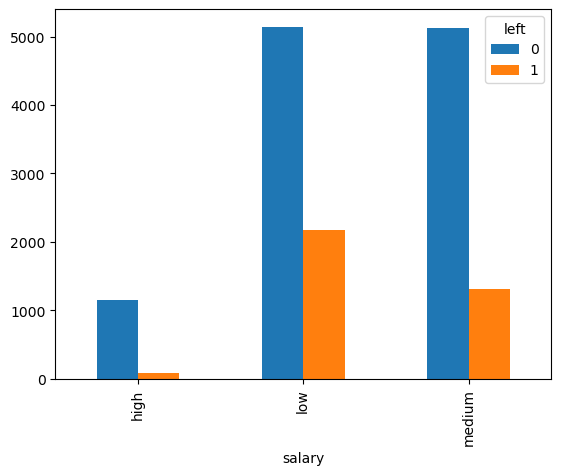

In [293]:
pd.crosstab(df.salary,df.left).plot(kind="bar")

<Axes: xlabel='Department'>

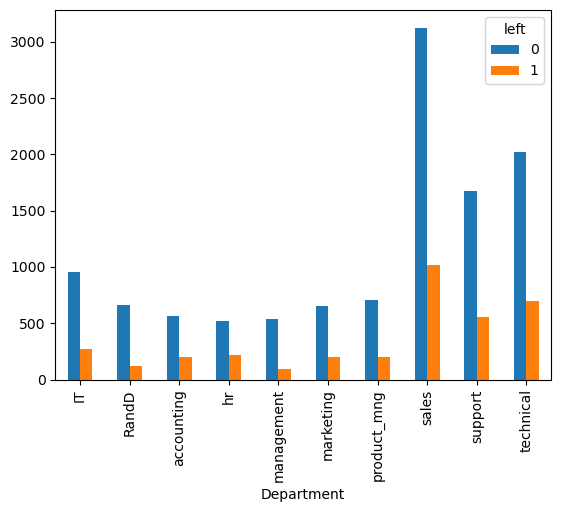

In [296]:
pd.crosstab(df.Department,df.left).plot(kind="bar")

In [297]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [300]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [302]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [304]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [306]:
df_with_dummies.drop("salary",axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [308]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

KeyError: "['salary'] not found in axis"

In [310]:
x=df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [312]:
y=df.left

In [318]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.3)

In [322]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [324]:
model.fit(X_train,y_train)

LogisticRegression()

In [326]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [328]:
model.score(X_test,y_test)

0.7770476190476191

In [5]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits=load_digits()

<Figure size 640x480 with 0 Axes>

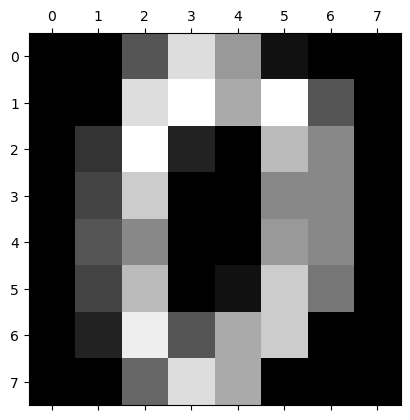

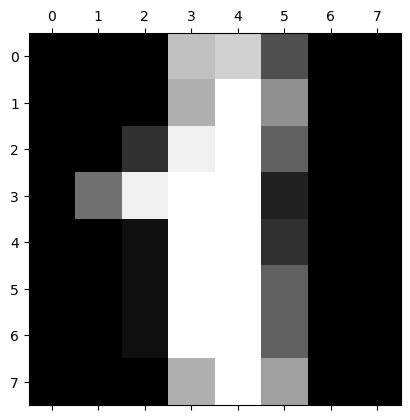

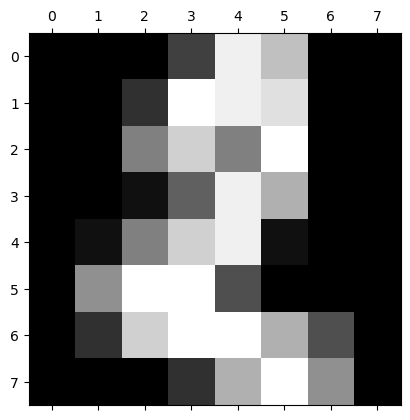

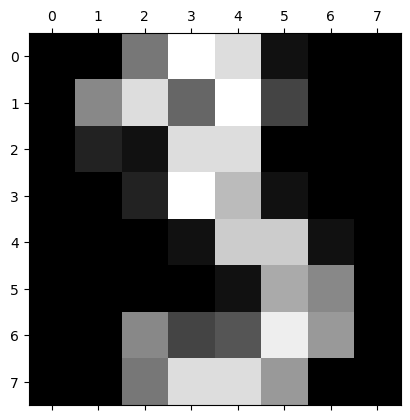

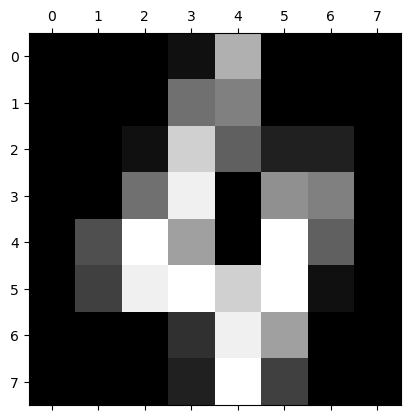

In [7]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
    

In [9]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [11]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [27]:
len(X_train)

1437

In [29]:
len(X_test)

360

In [31]:
model.fit(X_train,y_train)

C:\Users\Asus TUF\anaconda3.0\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
model.score(X_train,y_train)

1.0

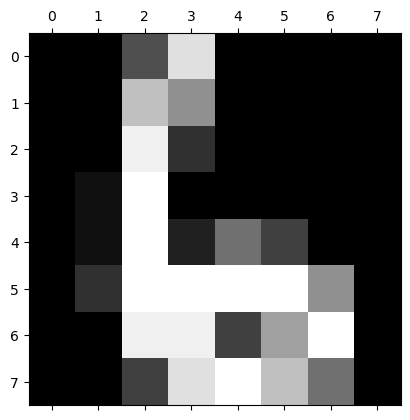

In [37]:
plt.matshow(digits.images[67])

In [43]:
digits.target[6]

6

In [47]:
model.predict([digits.data[67]])

array([6])

In [65]:
model.predict([digits.data[3]])

array([3])

In [67]:
y_predicted=model.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix

In [81]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  1],
       [ 1,  1,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 29,  0,  1],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 42]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

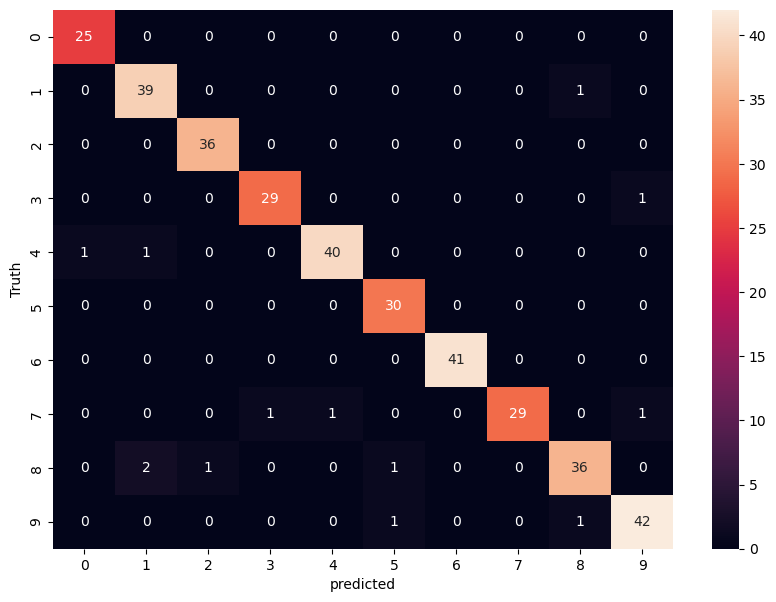

In [85]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [ ]:
COMPLETED